# Google PlayStore Apps Dataset

##### We will perform exploratory data analysis to understand what makes certain apps more popular than others. Identifying their characteristics, correlations between categories and other factors which contributed to their popularity. At the end, we are hoping to generate insights for app developers to understand the characteristics of successful apps and how to maximize their chance of success

##1. Preparing Environment for Data Analysis

#####1.1 Establishing connection between google drive and google colab 

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#####1.2 Importing relevant packages/libraries for analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##2. Data Preparation

#####2.1 Reading csv file from google drive and showing the content

In [56]:
df = pd.read_csv('/content/drive/MyDrive/UTS Classes/Data Processing using Python Spring 2022/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##3. Data Summary

#####3.1 Showing the first 5 rows of the dataset

In [57]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#####3.2 Showing the last 5 rows of the dataset

In [58]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#####3.3 Showing data types and total non-null values of each column

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#####3.4 Statistic summary of the dataset

In [60]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#####3.5 Showing column names of the dataset

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#####3.6 Total number of rows and columns in the dataset

In [62]:
df.shape

(10841, 13)

##4. Identifying Missing Values

#####4.1 Total missing values per column

In [63]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#####4.2 Total missing value per category

In [64]:
missing_value = (df.assign(Total = df['Rating'].isna() + df['Type'].isna() + df['Content Rating'].isna() + df['Current Ver'].isna() + df['Android Ver'].isna())
          .groupby('Category', as_index=False)
          .agg(NumberofCategories = ('Category','size'),
              Total = ('Total','sum'))
          ).rename(columns={'NumberofCategories': 'Total Rows',
                            'Total':'Total Blank Rows'})
missing_value.sort_values('Total Rows', ascending=False)


,Category,Total Rows,Total Blank Rows
12,FAMILY,1972,226
15,GAME,1144,47
30,TOOLS,843,110
21,MEDICAL,463,113
5,BUSINESS,460,157
26,PRODUCTIVITY,424,73
24,PERSONALIZATION,392,80
7,COMMUNICATION,387,59
29,SPORTS,384,65
19,LIFESTYLE,382,68


Observation: around 1,487 out of 10,841 rows have some missing values

#####4.3 Dropping missing values from the dataset

In [65]:
df = df.dropna()

4.4 Making sure there is no more missing values in the dataset

In [66]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##5. Identifying Duplicate Values

#####5.1 Total duplicate rows in the dataset

In [67]:
df_duplicate = df[df.duplicated()]
df_duplicate.shape

(474, 13)

#####5.2 Removing duplicate values

In [68]:
df = df.drop_duplicates()

#####5.3 Making sure there are no more duplicate values in the dataset

In [69]:
df_duplicate = df[df.duplicated()]
df_duplicate.shape

(0, 13)

##6. Dataset Condition after Removing Missing and Duplicate Values

#####6.1 Converting 'Reviews' column to numeric

In [70]:
df['Reviews']=pd.to_numeric(df['Reviews'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#####6.1 Summary of the dataset

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 971.9+ KB


#####6.2 Statistic summary of the dataset

In [72]:
df.describe()

,Rating,Reviews
count,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05
std,0.522428,2.906007e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.723000e+03
75%,4.500000,7.131325e+04
max,5.000000,7.815831e+07


#####6.3 Statistic summary for object data type

In [73]:
df.describe(include=['object'])

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886,8886
unique,8190,33,413,19,2,73,6,115,1299,2638,31
top,ROBLOX,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1717,1468,1485,8275,8275,7089,732,291,1258,1987


#####6.4 List of columns

In [74]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#####6.5 Total rows and columns

In [75]:
df.shape

(8886, 13)

##7. Identifying Outliers

#####7.1 Checking for outliers in Rating column

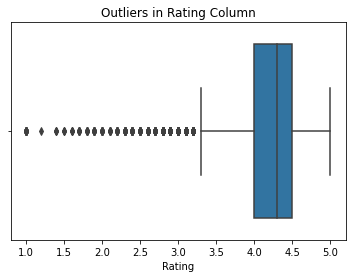

In [76]:
try:
  sns.boxplot(x=df['Rating'])
  plt.title('Outliers in Rating Column')
except Exception as e:
  print("Error type:", type(e).__name__)

#####7.2 Calculating total number of outliers in Rating column

In [77]:
try:
  Q1 = df['Rating'].quantile(0.25)
  Q3 = df['Rating'].quantile(0.75)
  IQR = Q3 - Q1
  total_outliers = ((df['Rating'] < (Q1 - 1.5 * IQR)) | (df['Rating'] > (Q3 + 1.5 * IQR))).sum()
  print(f"There are total {total_outliers} outliers in Rating column")
except Exception as e:
  print("Error type:", type(e).__name__)

There are total 494 outliers in Rating column


#####7.3 Apps with the lowest rating

In [78]:
df[df['Rating'] == df['Rating'].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
625,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0M,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
6490,MbH BM,MEDICAL,1.0,1,2.3M,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1,6.6M,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
7427,CJ DVD Rentals,COMMUNICATION,1.0,5,13M,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


#####7.4 Checking for outliers in Reviews column

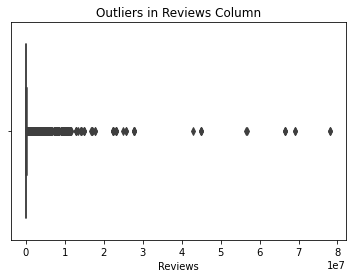

In [79]:
try:
  sns.boxplot(x=df['Reviews'])
  plt.title('Outliers in Reviews Column')
except Exception as e:
  print("Error type:", type(e).__name__)

#####7.5 Calculating total number of outliers in Reviews column

In [80]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3-Q1
total_outliers = ((df['Reviews'] < (Q1 - 1.5 * IQR)) | (df['Reviews'] > (Q3 + 1.5 * IQR))).sum()
print(f"There are total {total_outliers} in Reviews column")

There are total 1555 in Reviews column


#####7.6 Apps with the most reviews

In [81]:
df[df['Reviews'] == df['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


##8. Analysis

#####8.1 Rating distribution in the dataset

Text(0.5, 1.0, 'Rating Distribution')

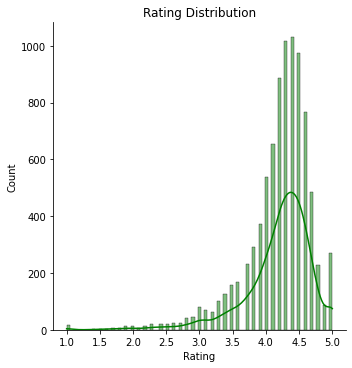

In [82]:
sns.displot(df['Rating'], kde=True, color='Green')
plt.title('Rating Distribution')

#####8.2 Apps distribution based on category

Text(0, 0.5, 'Count')

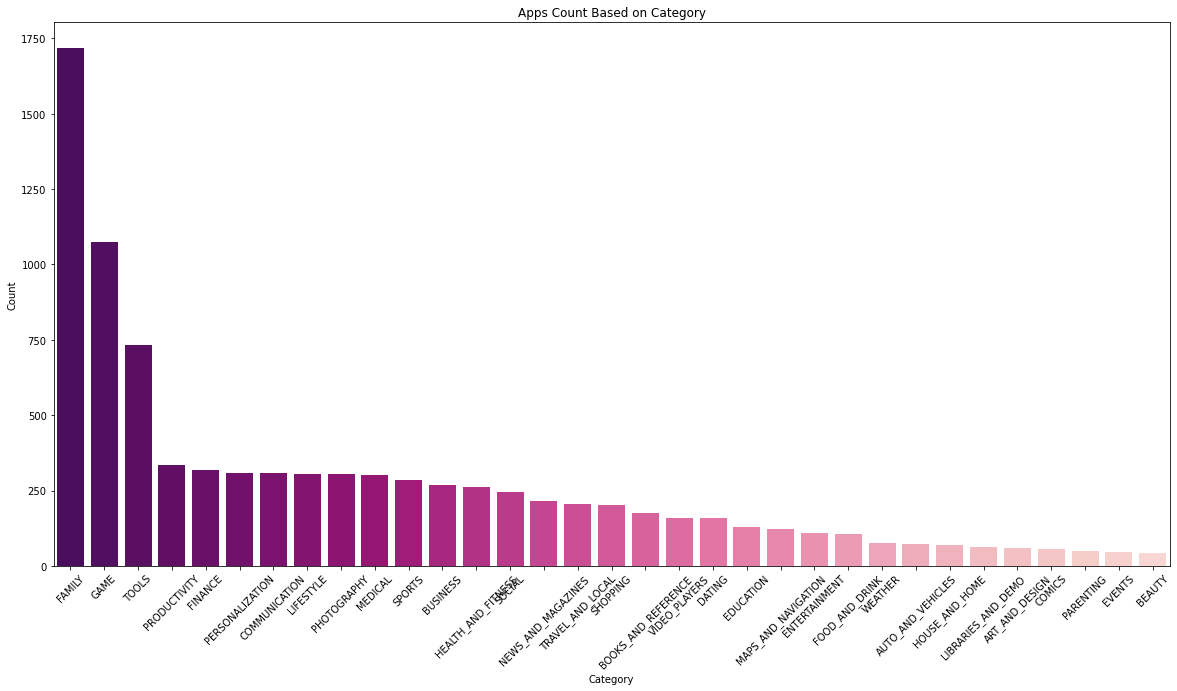

In [83]:
plt.figure(figsize = (20,10))
palette=sns.color_palette('RdPu', n_colors=40)
palette.reverse()
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values, palette=palette)
plt.xticks(rotation=45)
plt.title('Apps Count Based on Category')
plt.xlabel('Category')
plt.ylabel('Count')

#####8.3 Apps count based on "type"

Text(0.5, 0, 'Free/Paid')

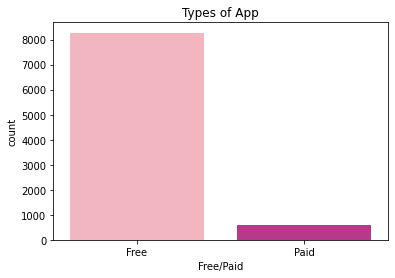

In [84]:
sns.countplot(x=df['Type'], palette='RdPu')
plt.title('Types of App')
plt.xlabel('Free/Paid')

#####8.3.1 Apps count based on "type" (Pie Chart)


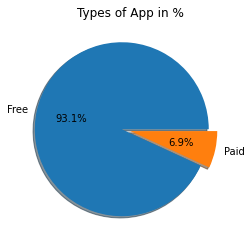

In [85]:
labels = ['Free','Paid']

sizes = [df['Type'].value_counts()[0],
         df['Type'].value_counts()[1]]
        
explode = [0.1,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
plt.title('Types of App in %')
plt.show()

#####8.4 Distribution of apps based on review

Text(0.5, 1.0, 'Review Distribution')

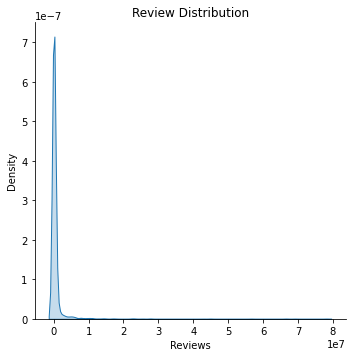

In [86]:
sns.displot(df, x='Reviews', kind='kde', fill=True)
plt.title('Review Distribution')

#####8.5 Correlation between rating and review

Text(0.5, 1.0, 'Review Count based on Rating')

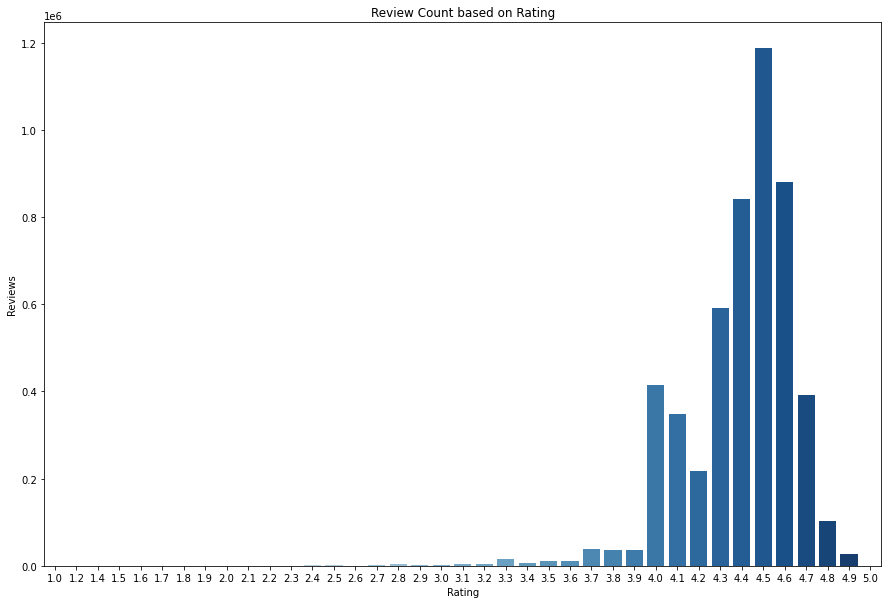

In [87]:
plt.figure(figsize = (15,10))
sns.barplot(data=df, x='Rating', y='Reviews',ci=None, palette='Blues')
plt.title('Review Count based on Rating')


#####8.5.1 Correlation between rating and review (Pairplot)

Text(0.5, 1.0, 'Rating and Review Correlation')

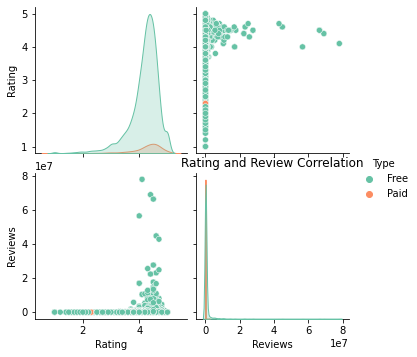

In [88]:
sns.pairplot(df, hue="Type", palette='Set2')
plt.title('Rating and Review Correlation')

#####8.5.2 Correlation between rating and review (Heatmap)

Text(0.5, 1.0, 'Rating and Review Correlation')

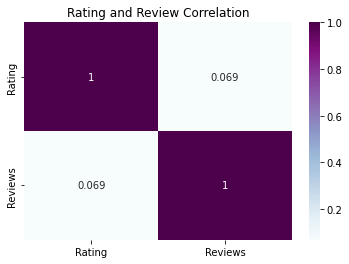

In [89]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='BuPu')
plt.title('Rating and Review Correlation')

#####8.6 Apps distribution based on number of installs

Text(0.5, 1.0, 'Count of Installs')

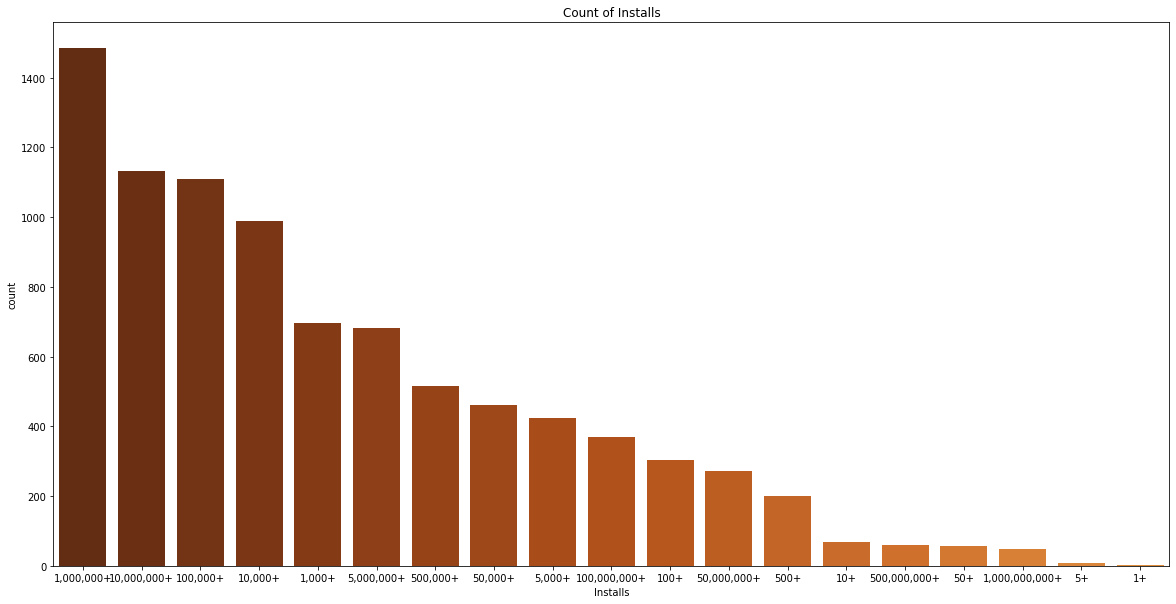

In [90]:
plt.figure(figsize = (20,10))
palette2=sns.color_palette('YlOrBr', n_colors=40)
palette2.reverse()
sns.countplot(x=df['Installs'], order = df['Installs'].value_counts().index, palette=palette2)
plt.title('Count of Installs')


#####8.7 Categories with most reviews

Text(0.5, 1.0, 'Categories with most reviews')

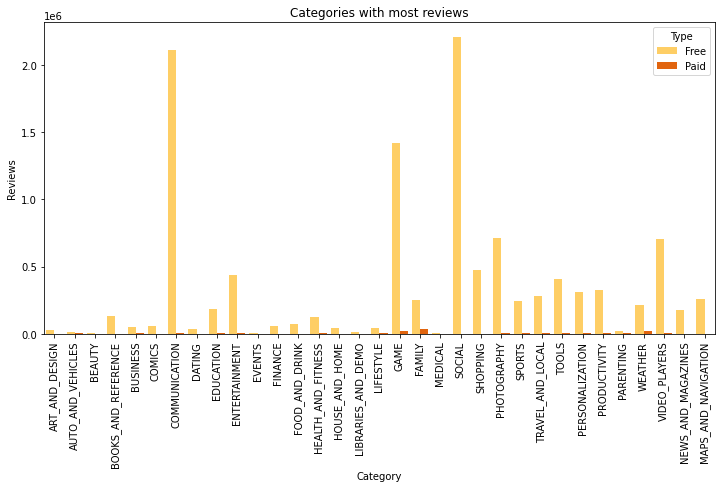

In [91]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(data=df, x='Category',y='Reviews', hue='Type', palette='YlOrBr', saturation=5, ci=None)
plt.title('Categories with most reviews')

#####8.8 Distribution of reviews based on pricing

Text(0.5, 1.0, 'Distribution of Reviews based on Types of App (Free/Paid)')

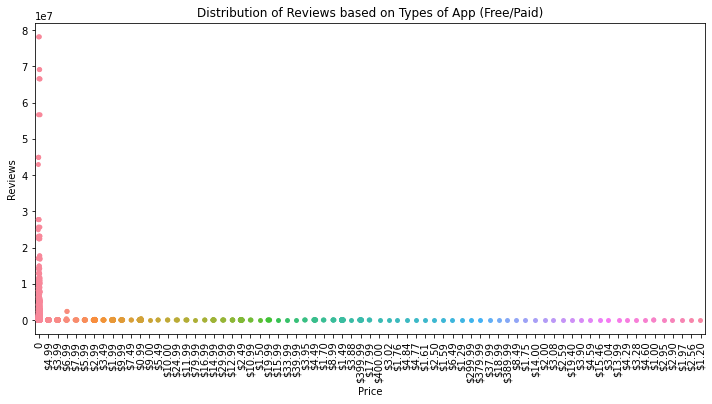

In [92]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
plt.tight_layout()
sns.stripplot(data=df, x='Price', y='Reviews')
plt.title('Distribution of Reviews based on Types of App (Free/Paid)')

#####8.9 Average rating based on category

Text(0.5, 1.0, 'Average Rating based on Category')

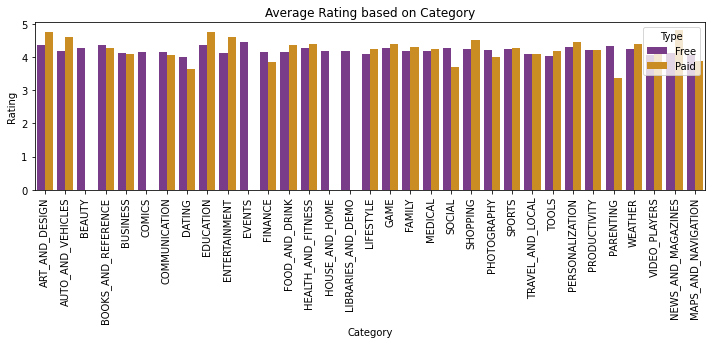

In [93]:
plt.figure(figsize = (10,3))
plt.xticks(rotation=90)
plt.tight_layout()
sns.barplot(data=df, x='Category',y='Rating', hue='Type', ci=None, palette='CMRmap')
plt.title('Average Rating based on Category')